# Computer Vision

## Lab 1


### Imports


In [163]:
# Computation
import cv2
import numpy as np
import scipy
from skimage import color, filters
from sklearn import metrics

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns


### Filter Kernels


In [164]:
prewitt_vertical = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_horizontal = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
laplacian_2d = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])


### Section 2 - Define Images


In [165]:
# RGB
image_35 = np.array(cv2.imread("./image-35.jpg")
                    [:, :, ::-1], dtype=np.uint8)
image_83 = np.array(cv2.imread("./image-83.jpg")
                    [:, :, ::-1], dtype=np.uint8)
image_110 = np.array(cv2.imread("./image-110.jpg")
                     [:, :, ::-1], dtype=np.uint8)

images = [image_35, image_83, image_110]
num_images = len(images)

# Grayscale
grayscale_35 = color.rgb2gray(image_35)
grayscale_83 = color.rgb2gray(image_83)
grayscale_110 = color.rgb2gray(image_110)

grayscales = [grayscale_35, grayscale_83, grayscale_110]
num_grayscales = len(grayscales)

# HSV
hsv_35 = color.rgb2hsv(image_35)
hsv_83 = color.rgb2hsv(image_83)
hsv_110 = color.rgb2hsv(image_110)

hsvs = [hsv_35, hsv_83, hsv_110]
num_hsvs = len(hsvs)

# Masks
mask_35 = np.array(cv2.imread("./mask-35.png")
                   [:, :, ::-1], dtype=np.uint8)
mask_83 = np.array(cv2.imread("./mask-83.png")
                   [:, :, ::-1], dtype=np.uint8)
mask_110 = np.array(cv2.imread("./mask-110.png")
                    [:, :, ::-1], dtype=np.uint8)

masks = [mask_35, mask_83, mask_110]
num_masks = len(masks)

# Masks Binary
mask_gray_35 = color.rgb2gray(mask_35)
mask_bin_35 = (mask_gray_35 > filters.threshold_mean(mask_gray_35)) * 1.0


mask_gray_83 = color.rgb2gray(mask_83)
mask_bin_83 = (mask_gray_83 > filters.threshold_mean(mask_gray_83)) * 1.0

mask_gray_110 = color.rgb2gray(mask_110)
mask_bin_110 = (mask_gray_110 > filters.threshold_mean(mask_gray_110)) * 1.0

masks_bin = [mask_bin_35, mask_bin_83, mask_bin_110]
num_masks_bin = len(masks_bin)


### Section 3 - Display Images


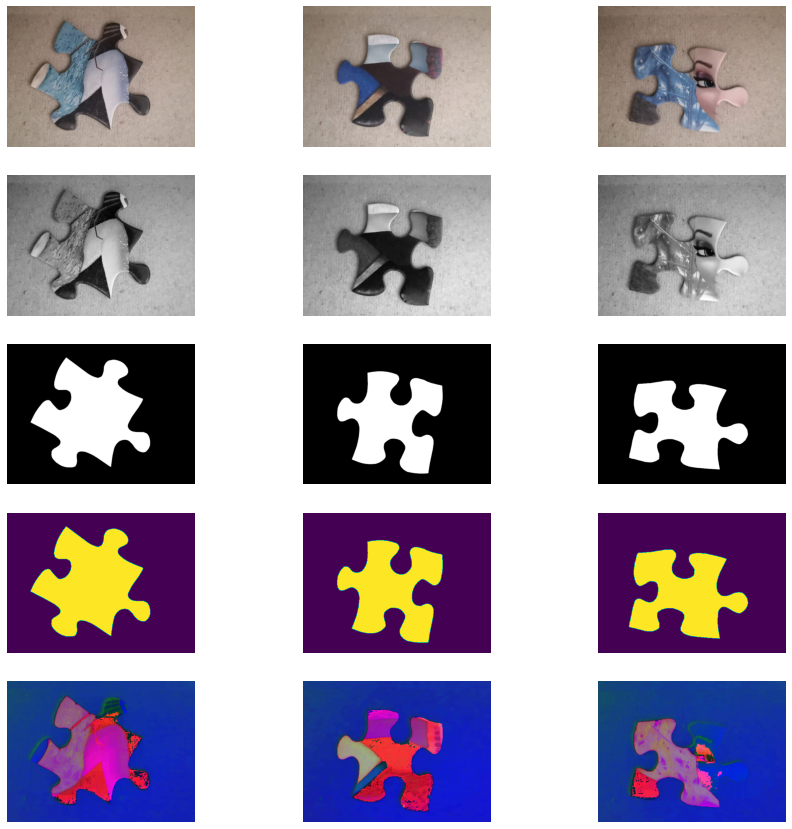

In [166]:
fig = plt.figure(figsize=(num_images * 5, 15))

for image, grayscale, mask, mask_bin, hsv, i in zip(images, grayscales, masks, masks_bin, hsvs, range(num_images)):
    fig.add_subplot(5, num_images, i+1)
    plt.imshow(image)
    plt.axis('off')

    fig.add_subplot(5, num_images, num_images+i+1)
    plt.imshow(grayscale, cmap="gray")
    plt.axis('off')

    fig.add_subplot(5, num_images, 2*num_images+i+1)
    plt.imshow(mask)
    plt.axis('off')
    
    
    fig.add_subplot(5, num_images, 3*num_images+i+1)
    plt.imshow(mask_bin)
    plt.axis('off')

    fig.add_subplot(5, num_images, 4*num_images+i+1)
    plt.imshow(hsv)
    plt.axis('off')


### Section 4 - Descriptive Statistics


#### Statistics


In [167]:
rows = [
    "width",
    "height",
    "total pixels",
    "black pixels",
    "white pixels",
    "gray min",
    "gray max",
    "puzzle min",
    "puzzle max",
    "bg min",
    "bg max",
    "gray mean",
    "puzzle mean",
    "bg mean",
    "puzzle var",
    "bg var",
]

columns = [
    "image-35",
    "image-83",
    "image-110"
]


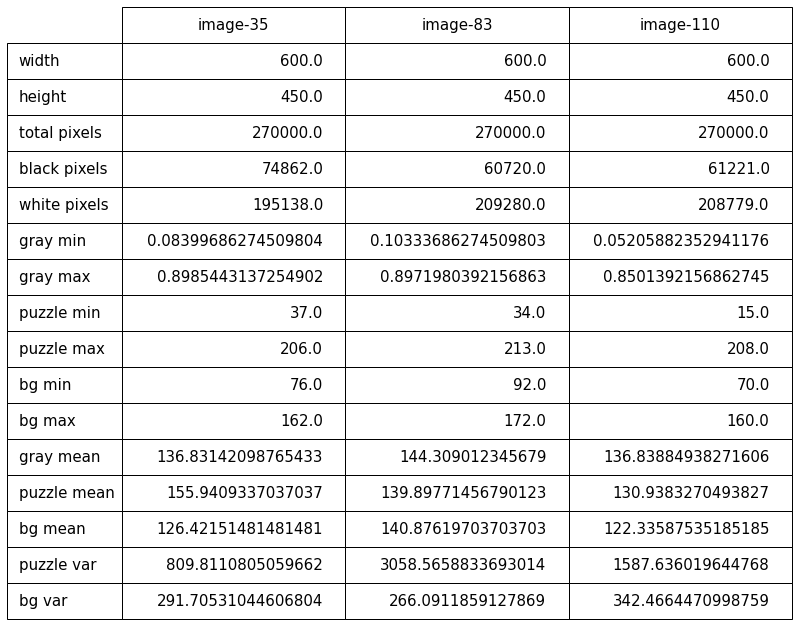

In [168]:
cell_text = np.zeros((len(rows), len(columns)))

for image, grayscale, mask, i in zip(images, grayscales, masks_bin, range(num_images)):
    image_height, image_width, image_channels = image.shape

    # 1. Image width
    cell_text[0, i] = image_width

    # 2. Image height
    cell_text[1, i] = image_height

    # 3. No. Pixels
    image_pixels = image_width * image_height
    cell_text[2, i] = image_pixels

    # 4. Mask Black Pixels
    black_pixels = np.count_nonzero(mask)
    cell_text[3, i] = black_pixels

    # 5. Mask White Pixels
    cell_text[4, i] = image_pixels - black_pixels

    # 6. Grayscale Min
    cell_text[5, i] = grayscale.min()

    # 7. Grayscale Max
    cell_text[6, i] = grayscale.max()

    # 8. Puzzle MinMax
    image_puzzle = image[np.invert(mask.astype(np.uint8))]
    cell_text[7, i] = image_puzzle.min()
    cell_text[8, i] = image_puzzle.max()

    # 9. Background MinMax
    image_background = image[mask.astype(np.uint8)]
    cell_text[9, i] = image_background.min()
    cell_text[10, i] = image_background.max()

    # 10. Mean pixel intensity
    cell_text[11, i] = image.mean()

    # 11. Puzzle Mean pixel intensity
    cell_text[12, i] = image_puzzle.mean()

    # 12. Background Mean pixel intensity
    cell_text[13, i] = image_background.mean()

    # 13. Puzzle pixel intensity Variance
    cell_text[14, i] = image_puzzle.var()

    # 14. Background pixel intensity Variance
    cell_text[15, i] = image_background.var()

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
table = plt.table(cellText=cell_text,
                  rowLabels=rows,
                  colLabels=columns,
                  loc='center')
table.set_fontsize(18)
table.scale(2, 3)


#### Histograms


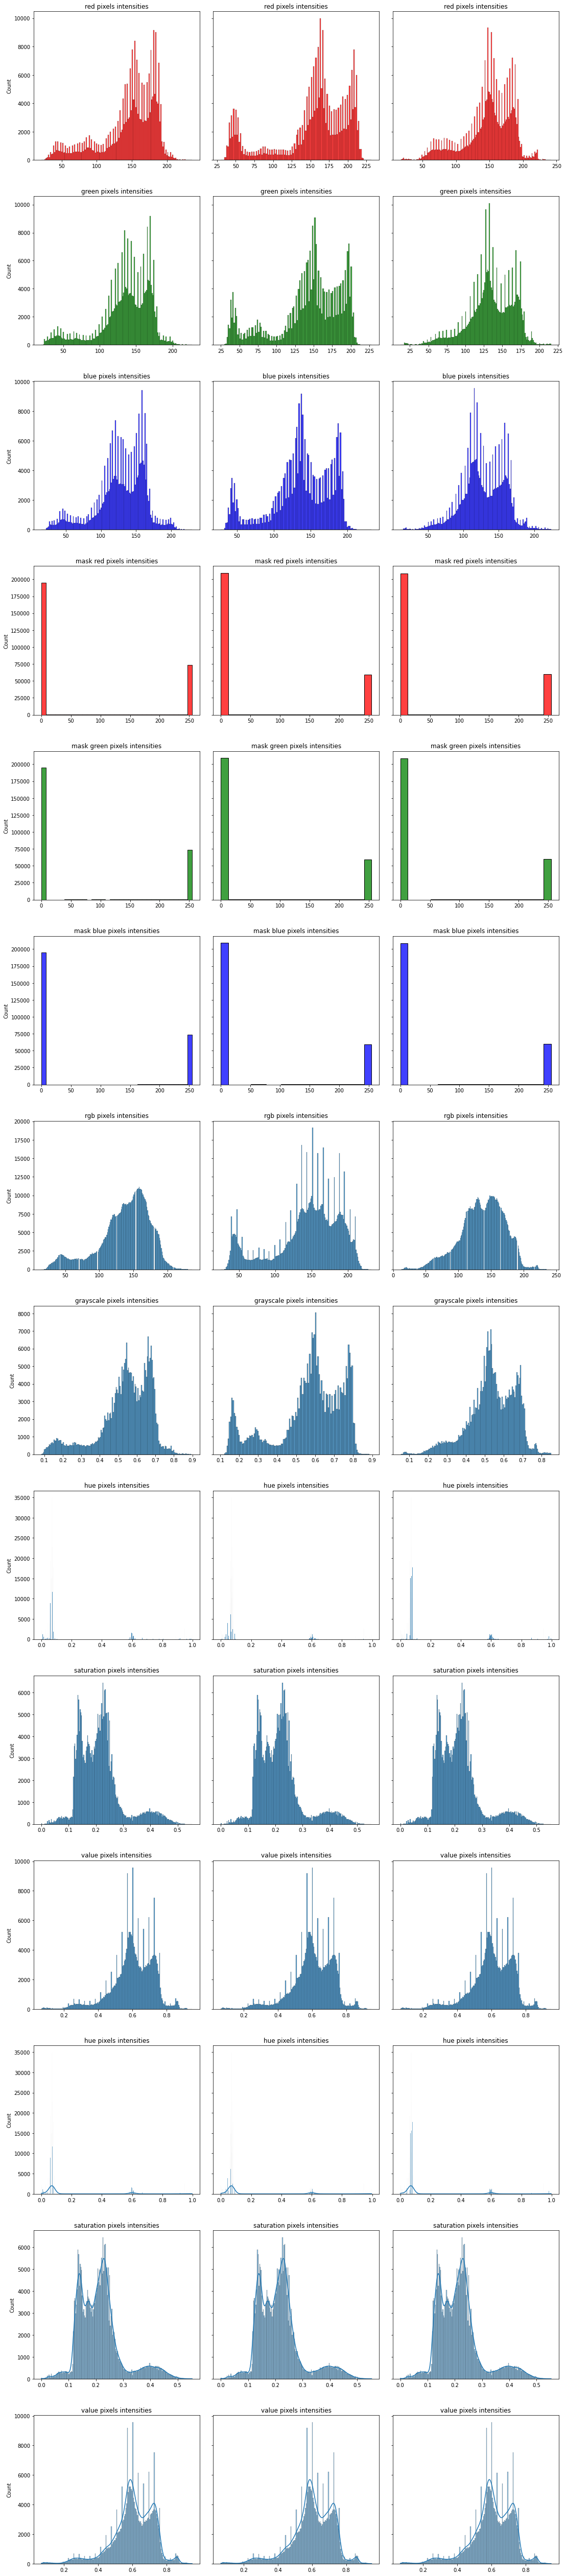

In [169]:
fig, axes = plt.subplots(14, num_images, sharey='row')

fig.set_figwidth(5 * num_images)
fig.set_figheight(5 * 14)
fig.tight_layout(h_pad=5)


for image, grayscale, mask, i in zip(images, grayscales, masks, range(num_images)):
    # 15. Image red pixel intensity histogram
    sns.histplot(
        ax=axes[0, i],
        data=image[:, :, 0].flatten(),
        color="r"
    ).set(
        title=f"red pixels intensities"
    )

    # 16. Image green pixel intensity histogram
    sns.histplot(
        ax=axes[1, i],
        data=image[:, :, 1].flatten(),
        color="g"
    ).set(
        title=f"green pixels intensities"
    )

    # 17. Image blue pixel intensity histogram
    sns.histplot(
        ax=axes[2, i],
        data=image[:, :, 2].flatten(),
        color="b"
    ).set(
        title=f"blue pixels intensities"
    )

    # 18.1 Mask red pixel intensity histogram
    sns.histplot(
        ax=axes[3, i],
        data=mask[:, :, 0].flatten(),
        color="r"
    ).set(
        title=f"mask red pixels intensities"
    )

    # 18.2 Mask green pixel intensity histogram
    sns.histplot(
        ax=axes[4, i],
        data=mask[:, :, 1].flatten(),
        color="g"
    ).set(
        title=f"mask green pixels intensities"
    )

    # 18.3 Mask blue pixel intensity histogram
    sns.histplot(
        ax=axes[5, i],
        data=mask[:, :, 2].flatten(),
        color="b"
    ).set(
        title=f"mask blue pixels intensities"
    )

    # 19.
    sns.histplot(
        ax=axes[6, i],
        data=image.flatten()
    ).set(
        title=f"rgb pixels intensities"
    )

    # 20.
    sns.histplot(
        ax=axes[7, i],
        data=grayscale.flatten()
    ).set(
        title=f"grayscale pixels intensities"
    )

    # 21.1 Hue pixel intensity histogram
    sns.histplot(
        ax=axes[8, i],
        data=hsv[:, :, 0].flatten()
    ).set(
        title=f"hue pixels intensities"
    )

    # 21.2 Saturation pixel intensity histogram
    sns.histplot(
        ax=axes[9, i],
        data=hsv[:, :, 1].flatten()
    ).set(
        title=f"saturation pixels intensities"
    )

    # 21.3 Value pixel intensity histogram
    sns.histplot(
        ax=axes[10, i],
        data=hsv[:, :, 2].flatten()
    ).set(
        title=f"value pixels intensities"
    )

    # 22.1 Hue pixel intensity histogram (Kernel Density Estimates)
    sns.histplot(
        ax=axes[11, i],
        data=hsv[:, :, 0].flatten(),
        kde=True
    ).set(
        title=f"hue pixels intensities"
    )

    # 22.2 Saturation pixel intensity histogram (Kernel Density Estimates)
    sns.histplot(
        ax=axes[12, i],
        data=hsv[:, :, 1].flatten(),
        kde=True
    ).set(
        title=f"saturation pixels intensities"
    )

    # 22.3 Value pixel intensity histogram (Kernel Density Estimates)
    sns.histplot(
        ax=axes[13, i],
        data=hsv[:, :, 2].flatten(),
        kde=True
    ).set(
        title=f"value pixels intensities"
    )


### Section 5 - Bonus


#### Contrast Stretching


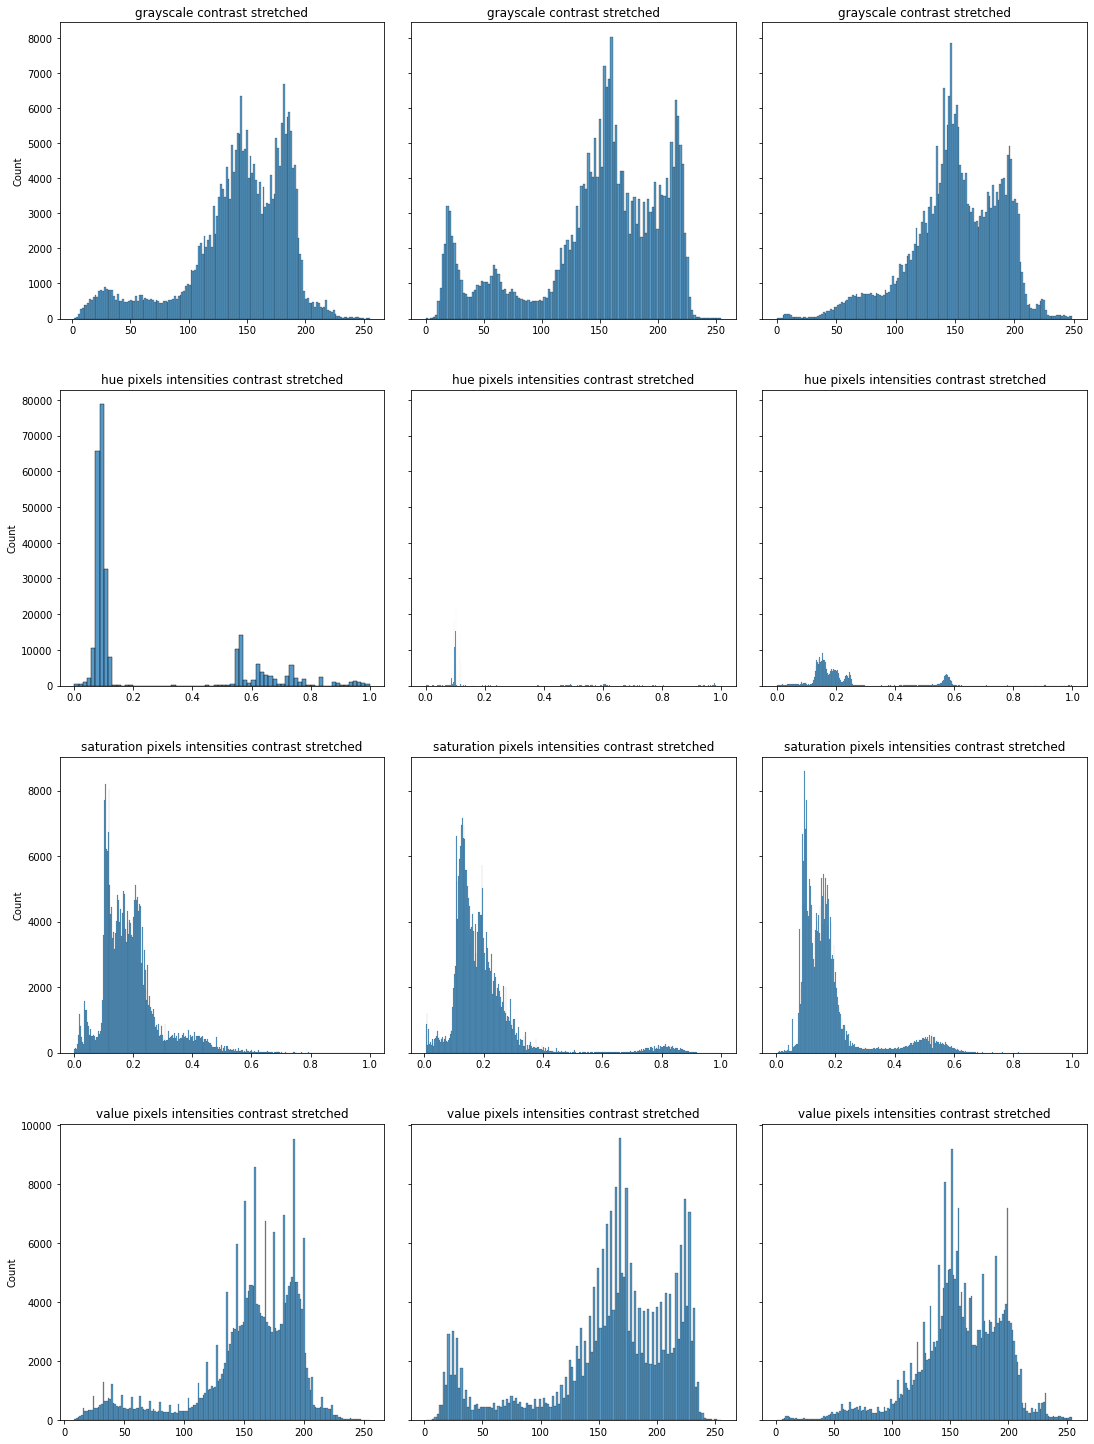

In [170]:
def channel_contrast_stretch(channel):
    channel_min, channel_max = np.amin(channel), np.amax(channel)
    return (channel - channel_min) / (channel_max - channel_min)


fig, axes = plt.subplots(4, num_images, sharey='row')

fig.set_figwidth(5 * num_images)
fig.set_figheight(5 * 4)
fig.tight_layout(h_pad=5)

for i, image in enumerate(images):
    image_float = image / 255
    image_stretched = np.zeros(image.shape)

    image_stretched[:, :, 0] = channel_contrast_stretch(image_float[:, :, 0])
    image_stretched[:, :, 1] = channel_contrast_stretch(image_float[:, :, 1])
    image_stretched[:, :, 2] = channel_contrast_stretch(image_float[:, :, 2])

    image_stretched = image_stretched * 255

    grayscale = color.rgb2gray(image_stretched)
    hsv = color.rgb2hsv(image_stretched)

    # Grayscale pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[0, i],
        data=grayscale.flatten()
    ).set(
        title=f"grayscale contrast stretched"
    )

    # Hue pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[1, i],
        data=hsv[:, :, 0].flatten()
    ).set(
        title=f"hue pixels intensities contrast stretched"
    )

    # Saturation pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[2, i],
        data=hsv[:, :, 1].flatten()
    ).set(
        title=f"saturation pixels intensities contrast stretched"
    )

    # Value pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[3, i],
        data=hsv[:, :, 2].flatten()
    ).set(
        title=f"value pixels intensities contrast stretched"
    )


#### Histogram Equalization


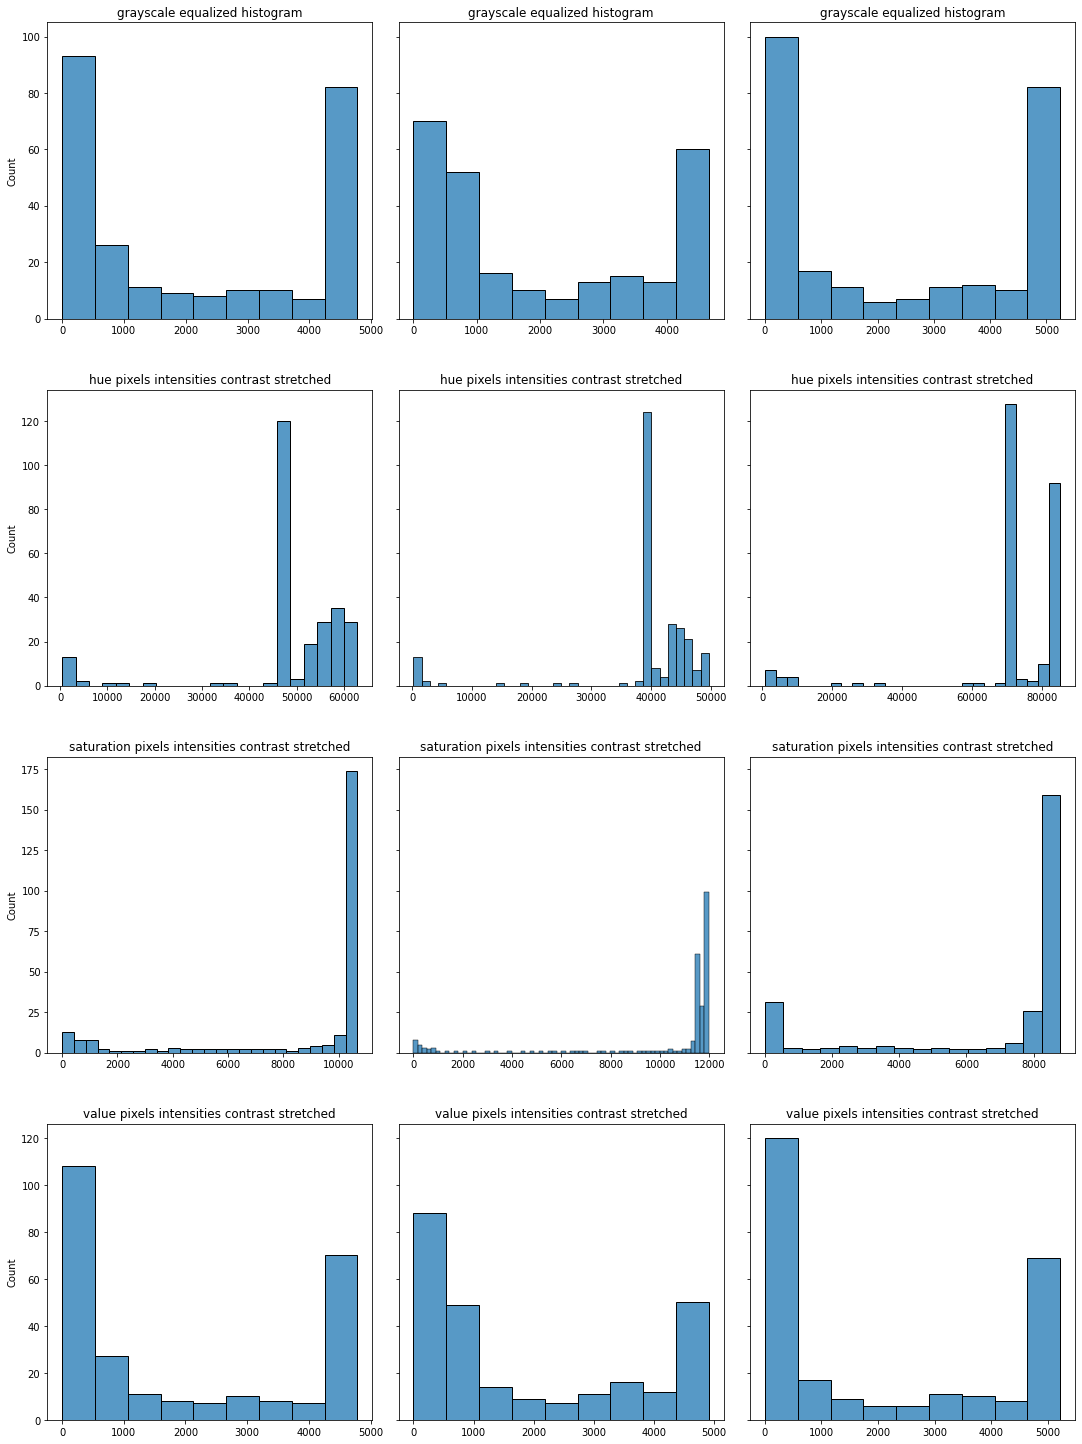

In [171]:
def channel_equalization(channel):
    hist, bins = np.histogram(channel.flatten(), 256, [0, 1])
    cdf = hist.cumsum()
    normalized = cdf * hist.max() / cdf.max()
    return normalized


fig, axes = plt.subplots(4, num_images, sharey='row')

fig.set_figwidth(5 * num_images)
fig.set_figheight(5 * 4)
fig.tight_layout(h_pad=5)

for grayscale, hsv, i in zip(grayscales, hsvs, range(num_images)):
    grayscale_equalized = channel_equalization(grayscale)
    hue_equalized = channel_equalization(hsv[:, :, 0])
    saturation_equalized = channel_equalization(hsv[:, :, 1])
    value_equalized = channel_equalization(hsv[:, :, 2])

    # Grayscale pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[0, i],
        data=grayscale_equalized.flatten()
    ).set(
        title=f"grayscale equalized histogram"
    )

    # Hue pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[1, i],
        data=hue_equalized.flatten()
    ).set(
        title=f"hue pixels intensities contrast stretched"
    )

    # Saturation pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[2, i],
        data=saturation_equalized.flatten()
    ).set(
        title=f"saturation pixels intensities contrast stretched"
    )

    # Value pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[3, i],
        data=value_equalized.flatten()
    ).set(
        title=f"value pixels intensities contrast stretched"
    )


### Section 6 - Background Classifier


#### Question 1


In [172]:
def convolve(image_arr, kernel):
    """Apply a convolution to an image based on given kernel and padding type

    Args:
        image_arr (NDArray): N X M Image
        kernel (NDArray): _description_

    Returns:
        new_image_arr (NDArray): N X M Image with applied filter
    """
    # Rotate 180 for convolution
    kernel = np.rot90(kernel, k=2)

    kernel_h, kernel_w = kernel.shape
    pad_h, pad_w = kernel_h // 2, kernel_w // 2

    height, width = image_arr.shape

    pad_width = ((pad_h, pad_h), (pad_w, pad_w))
    image_pad = np.pad(image_arr, pad_width=pad_width)

    new_image = np.zeros(image_arr.shape)
    for i in range(height):
        for j in range(width):
            new_image[i, j] = (
                image_pad[i:i+kernel_h, j:j+kernel_w] * kernel).sum()

    return new_image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 599.5, 449.5, -0.5)

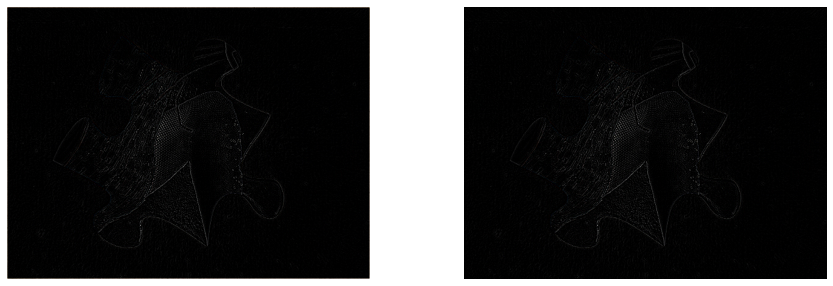

In [173]:
# Test Convolve
image_float = image_35 / 255

custom_convolution = np.zeros(image_float.shape)
custom_convolution[:, :, 0] = convolve(image_float[:, :, 0], laplacian_2d)
custom_convolution[:, :, 1] = convolve(image_float[:, :, 1], laplacian_2d)
custom_convolution[:, :, 2] = convolve(image_float[:, :, 2], laplacian_2d)

library_convolution = cv2.filter2D(
    image_float, -1, np.rot90(laplacian_2d, k=2))

fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
plt.imshow(custom_convolution)
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(library_convolution)
plt.axis('off')


#### Question 2


In [174]:
def get_image_features(image, hsv):
    features = np.zeros((np.prod(image.shape[:-1]), 15))
    image_float = image / 255

    image_r = image_float[:, :, 0]
    image_g = image_float[:, :, 1]
    image_b = image_float[:, :, 2]

    # RGB
    features[:, 0] = image_r.flatten()
    features[:, 1] = image_g.flatten()
    features[:, 2] = image_b.flatten()

    # HSV
    features[:, 3] = hsv[:, :, 0].flatten()
    features[:, 4] = hsv[:, :, 1].flatten()
    features[:, 5] = hsv[:, :, 2].flatten()

    # Prewitt Vertical
    features[:, 6] = convolve(image_r, prewitt_vertical).flatten()
    features[:, 7] = convolve(image_g, prewitt_vertical).flatten()
    features[:, 8] = convolve(image_b, prewitt_vertical).flatten()

    # Prewitt Horizontal
    features[:, 9] = convolve(image_r, prewitt_horizontal).flatten()
    features[:, 10] = convolve(image_g, prewitt_horizontal).flatten()
    features[:, 11] = convolve(image_b, prewitt_horizontal).flatten()

    # Laplacian
    features[:, 12] = convolve(image_r, laplacian_2d).flatten()
    features[:, 13] = convolve(image_g, laplacian_2d).flatten()
    features[:, 14] = convolve(image_b, laplacian_2d).flatten()

    return features


In [175]:
training_features = get_image_features(image_35, hsv_35)
print(training_features.shape)


(270000, 15)


#### Question 3


In [176]:
features_mean = np.mean(training_features, axis=0)
print("mean", features_mean.shape)

features_cov = np.cov(training_features.T)
print("cov", features_cov.shape)


mean (15,)
cov (15, 15)


#### Question 4


In [177]:
validation_features = get_image_features(image_83, hsv_83)
print(validation_features.shape)


(270000, 15)


In [178]:
normal_dist = scipy.stats.multivariate_normal(
    mean=features_mean,
    cov=features_cov)
normal_pdf = normal_dist.pdf(validation_features)

print(f"θ_min = {normal_pdf.min()}")
print(f"θ_max = {normal_pdf.max()}")

theta = 1.6e+12

predicted = (normal_pdf < theta).reshape(image_83.shape[:-1]) * 1

accuracy = 1 - \
    np.sum(np.abs(predicted - mask_bin_83)) / \
    np.prod(predicted.shape)

print(f"accuracy = {accuracy}")


θ_min = 0.0
θ_max = 1.6588770851839536e+16
accuracy = 0.9100407407407407


Text(0.5, 1.0, 'mask-83.png')

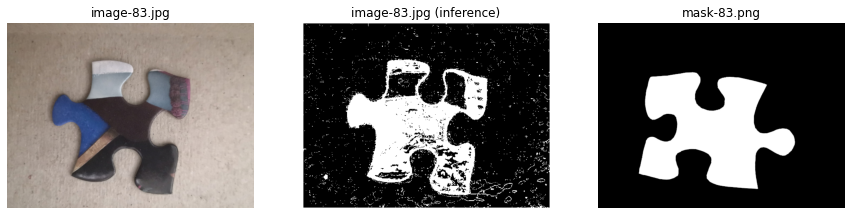

In [179]:
fig = plt.figure(figsize=(num_images * 5, 15))

fig.add_subplot(1, 3, 1)
plt.imshow(image_83)
plt.axis('off')
plt.title("image-83.jpg")

fig.add_subplot(1, 3, 2)
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.title(f"image-83.jpg (inference)")

fig.add_subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("mask-83.png")


#### Question 5


In [180]:
def get_image_features_with_hsv(image, hsv):
    features = np.zeros((np.prod(image.shape[:-1]), 24))
    features[:, :15] = get_image_features(image, hsv)

    hue = hsv[:, :, 0]
    saturation = hsv[:, :, 1]
    value = hsv[:, :, 2]

    # HSV Prewitt Vertical
    features[:, 15] = convolve(hue, prewitt_vertical).flatten()
    features[:, 16] = convolve(saturation, prewitt_vertical).flatten()
    features[:, 17] = convolve(value, prewitt_vertical).flatten()

    # HSV Prewitt Horizontal
    features[:, 18] = convolve(hue, prewitt_horizontal).flatten()
    features[:, 19] = convolve(saturation, prewitt_horizontal).flatten()
    features[:, 20] = convolve(value, prewitt_horizontal).flatten()

    # HSV Laplacian
    features[:, 21] = convolve(hue, laplacian_2d).flatten()
    features[:, 22] = convolve(saturation, laplacian_2d).flatten()
    features[:, 23] = convolve(value, laplacian_2d).flatten()

    return features


##### With HSV


In [181]:
training_features_hsv = get_image_features_with_hsv(image_35, hsv_35)
print(training_features_hsv.shape)


(270000, 24)


In [182]:
features_hsv_mean = np.mean(training_features_hsv, axis=0)
print("mean", features_hsv_mean.shape)

features_hsv_cov = np.cov(training_features_hsv.T)
print("cov", features_hsv_cov.shape)


mean (24,)
cov (24, 24)


In [183]:
validation_features_hsv = get_image_features_with_hsv(image_83, hsv_83)
print(validation_features_hsv.shape)


(270000, 24)


In [184]:
normal_dist_hsv = scipy.stats.multivariate_normal(
    mean=features_hsv_mean,
    cov=features_hsv_cov)
normal_pdf_hsv = normal_dist_hsv.pdf(validation_features_hsv)

print(f"θ_min = {normal_pdf_hsv.min()}")
print(f"θ_max = {normal_pdf_hsv.max()}")

theta_hsv = 4e+20

predicted_hsv = (normal_pdf_hsv < theta_hsv)\
    .reshape(image_83.shape[:-1]) * 1.0

accuracy_hsv = 1 - \
    np.sum(np.abs(predicted_hsv - mask_bin_83)) / \
    np.prod(predicted_hsv.shape)

print(f"accuracy = {accuracy_hsv}")


θ_min = 0.0
θ_max = 2.3981992019315335e+25
accuracy = 0.9056740740740741


Text(0.5, 1.0, 'mask-83.png')

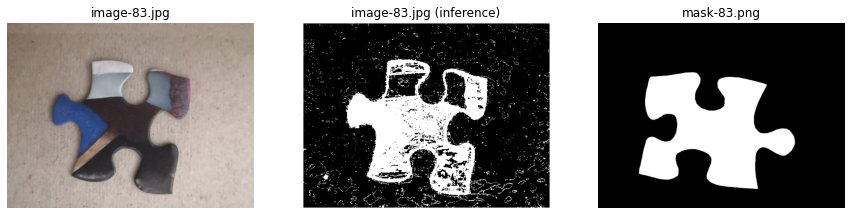

In [185]:
fig = plt.figure(figsize=(num_images * 5, 15))

fig.add_subplot(1, 3, 1)
plt.imshow(image_83)
plt.axis('off')
plt.title("image-83.jpg")

fig.add_subplot(1, 3, 2)
plt.imshow(predicted_hsv, cmap='gray')
plt.axis('off')
plt.title(f"image-83.jpg (inference)")

fig.add_subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("mask-83.png")


##### Without RGB Pixels


In [206]:
training_features_no_rgb = training_features_hsv[:, 3:]
validation_features_no_rgb = validation_features_hsv[:, 3:]

features_no_rgb_mean = np.mean(training_features_no_rgb, axis=0)
print("mean", features_no_rgb_mean.shape)

features_no_rgb_cov = np.cov(training_features_no_rgb.T)
print("cov", features_no_rgb_cov.shape)

mean (21,)
cov (21, 21)


In [205]:
normal_dist_no_rgb = scipy.stats.multivariate_normal(
    mean=features_no_rgb_mean,
    cov=features_no_rgb_cov)
normal_pdf_no_rgb = normal_dist_no_rgb.pdf(
    validation_features_no_rgb)

print(f"θ_min = {normal_pdf_no_rgb.min()}")
print(f"θ_max = {normal_pdf_no_rgb.max()}")

theta_no_rgb = 8e+15

predicted_no_rgb = (normal_pdf_no_rgb < theta_no_rgb)\
    .reshape(image_83.shape[:-1]) * 1.0

accuracy_no_rgb = 1 - \
    np.sum(np.abs(predicted_no_rgb - mask_bin_83)) / \
    np.prod(predicted_no_rgb.shape)

print(f"accuracy = {accuracy_no_rgb}")


θ_min = 0.0
θ_max = 7.638834968893966e+20
accuracy = 0.8760074074074073


Text(0.5, 1.0, 'mask-83.png')

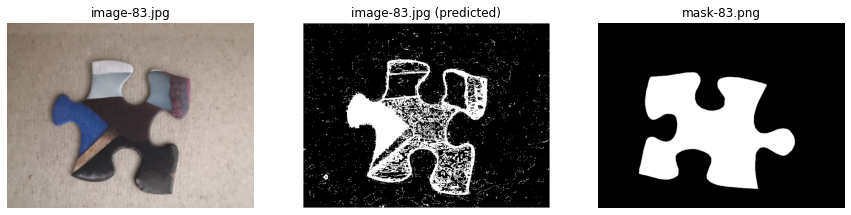

In [190]:
fig = plt.figure(figsize=(num_images * 5, 15))

fig.add_subplot(1, 3, 1)
plt.imshow(image_83)
plt.axis('off')
plt.title("image-83.jpg")

fig.add_subplot(1, 3, 2)
plt.imshow(predicted_no_rgb, cmap='gray')
plt.axis('off')
plt.title(f"image-83.jpg (predicted)")

fig.add_subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("mask-83.png")


#### Question 6


##### Test features


In [191]:
testing_features = get_image_features(image_110, hsv_110)
print(testing_features.shape)


(270000, 15)


In [196]:
normal_test_pdf = normal_dist.pdf(testing_features)

# Check pdf < theta to invert
test_predicted = (normal_test_pdf < theta).reshape(image_110.shape[:-1]) * 1.0

accuracy = 1 - \
    np.sum(np.abs(test_predicted - mask_bin_110)) / \
    np.prod(test_predicted.shape)

print(f"accuracy = {accuracy}")


accuracy = 0.9557518518518519


#### Question 7


##### a) Confusion matrix


In [209]:
test_cm = metrics.confusion_matrix(mask_bin_110.flatten(), test_predicted.flatten())
test_cm

array([[200282,   8497],
       [  3450,  57771]], dtype=int64)

In [207]:
testing_features_hsv = get_image_features_with_hsv(image_110, hsv_110)
testing_features_no_rgb = testing_features_hsv[:, 3:]

In [210]:
normal_test_pdf_hsv = normal_dist_hsv.pdf(testing_features_hsv)

test_predicted_hsv = (normal_test_pdf_hsv < theta_hsv) * 1.0

test_hsv_cm = metrics.confusion_matrix(mask_bin_110.flatten(), test_predicted_hsv)
test_hsv_cm

array([[197336,  11443],
       [  2721,  58500]], dtype=int64)

In [211]:
normal_test_pdf_no_rgb = normal_dist_no_rgb.pdf(testing_features_no_rgb)

test_predicted_no_rgb = (normal_test_pdf_no_rgb < theta_no_rgb) * 1.0

test_no_rgb_cm = metrics.confusion_matrix(mask_bin_110.flatten(), test_predicted_no_rgb)
test_no_rgb_cm

array([[200237,   8542],
       [ 22901,  38320]], dtype=int64)

##### b) Cohen's Kappa

In [214]:
test_kappa = metrics.cohen_kappa_score(mask_bin_110.flatten(), test_predicted.flatten())
print(f"Kappa = {test_kappa}")

test_hsv_kappa = metrics.cohen_kappa_score(mask_bin_110.flatten(), test_predicted_hsv)
print(f"Kappa = {test_hsv_kappa} (With HSV)")

test_no_rgb_kappa = metrics.cohen_kappa_score(mask_bin_110.flatten(), test_predicted_no_rgb)
print(f"Kappa = {test_no_rgb_kappa} (Without RGB)")


Kappa = 0.87738768963929
Kappa = 0.8575704082931507 (With HSV)
Kappa = 0.6378853013856809 (Without RGB)


##### c) IoU (Intersection over Union)

In [227]:
test_intersection = np.count_nonzero(mask_bin_110 * test_predicted)
test_union = np.count_nonzero(mask_bin_110 + test_predicted)
test_iou = test_intersection / test_union
print(f"IoU = {test_iou}")

test_hsv_intersection = np.count_nonzero(mask_bin_110.flatten() * test_predicted_hsv)
test_hsv_union = np.count_nonzero(mask_bin_110.flatten() + test_predicted_hsv)
test_hsv_iou = test_hsv_intersection / test_hsv_union
print(f"IoU = {test_hsv_iou} (With HSV)")

test_no_rgb_intersection = np.count_nonzero(mask_bin_110.flatten() * test_predicted_no_rgb)
test_no_rgb_union = np.count_nonzero(mask_bin_110.flatten() + test_predicted_no_rgb)
test_no_rgb_iou = test_no_rgb_intersection / test_no_rgb_union
print(f"IoU = {test_no_rgb_iou} (Without RGB)")

IoU = 0.8286382282911157
IoU = 0.805075415611582 (With HSV)
IoU = 0.5492883046887318 (Without RGB)
